### Generation of the Liouville operator and time propagtor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Liouville operator
def Liouville_operator(x, del_x, n):
  A = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if (i==j and j > 0):
        A[i,j] = -x[j]**2 / del_x
      elif (i==j-1 and j > 0):
        A[i,j] = x[j]**2 / del_x

  return A

# x range and grid spacing
x = np.linspace(0, 2, 2000)
del_x = x[1] - x[0]

# number of grid points
n_grid = len(x)

# Generate Liouville operator
A = Liouville_operator(x, del_x, n_grid)

# Time step size
delta = 0.01

# Exponential of Liouville operator
exp_mat = la.expm(A*delta)

# Initial condition
x0 = 1
P = np.zeros((n_grid,1))
index = np.abs(x - x0).argmin()
P[index] = 1

# Number of time steps
n_time = 10000

# Store the probability distribution at each time step
P_store = np.zeros((n_grid,n_time))

from tqdm import tqdm

# Run time evolution
for i in tqdm(range(n_time)):
  P = np.dot(exp_mat, P)
  P_store[:,i] = P[:,0]

# Flip the probability distribution for plotting
P_store = np.flipud(P_store)
x = np.flipud(x)

# Chop off the top
P_store = P_store[index:,:]
x = x[index:]

100%|██████████| 10000/10000 [00:59<00:00, 168.60it/s]


### Plotting the results

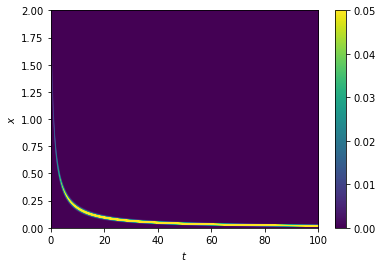

In [3]:
plt.imshow(P_store, aspect='auto', extent=[0, n_time*delta, 0, n_grid*del_x,], vmax=0.05)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.colorbar()
plt.savefig('plots/CME_delta.pdf')
plt.show()

### Comparing to analytical solution

To do this, we take the mode at each time step and plot this against the analytical solution

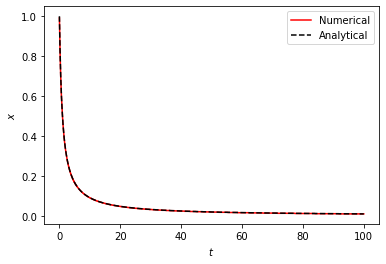

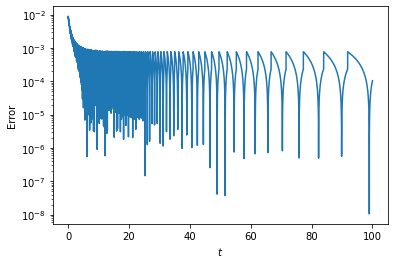

In [4]:
t = np.linspace(0, n_time*delta, n_time)

def analytical(x0, t):
  return 1/(t+x0)

max_indices = np.argmax(P_store, axis=0)
plt.plot(t, x[max_indices], color='red')
plt.plot(t, analytical(x0, t), color='black', linestyle='dashed')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend(['Numerical', 'Analytical'])
plt.savefig('plots/CME_delta_mode.pdf')
plt.show()

# Plot the error
plt.plot(t, np.abs(x[max_indices]-analytical(x0, t)))
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('Error')
plt.savefig('plots/CME_delta_error.pdf')
plt.show()


### Higher dimensional case

In [7]:
# Parameters
n_time = 1200
n_grid = 50
x_extent = (0,2)
y_extent = (0,2)

# Grid
x = np.linspace(x_extent[0], x_extent[1], n_grid)
y = np.linspace(y_extent[0], y_extent[1], n_grid)

# Grid spacing
del_x = x[1] - x[0]
del_y = y[1] - y[0]

# Time step size
delta = 0.001

# Initial conditions
x0 = 1
y0 = 1
P = np.zeros((n_grid, n_grid))
x_index = np.abs(x - x0).argmin()
y_index = np.abs(y-y0).argmin()
P[x_index, y_index] = 1

# Liouville operator
def Liouville_operator_2D(x, y, del_x, del_y, n):
  A = np.zeros((n**2,n**2))
  
  for i in range(n):
    for j in range(n):
      index = i*n + j
      for k in range(n**2):
        if (k == index+n):
          A[index,k] += (x[i]**2 + x[i]*y[j])/del_x
        if (k == index):
          A[index,k] += -(x[i]**2 + x[i]*y[j])/del_x + y[j]**2/del_y
        if (k == index+1):
          A[index,k] += y[j]**2/del_y
  return A

# Generate Liouville operator
print('Generating Liouville operator')
A = Liouville_operator_2D(x, y, del_x, del_y, n_grid)

# Exponential of Liouville operator
print('Computing matrix exponential')
exp_mat = la.expm(A*delta)

# Store the probability distribution at each time step
P_store = np.zeros((n_grid, n_grid, n_time))

from tqdm import tqdm

print('Running time evolution')
# Run time evolution
for i in tqdm(range(n_time)):
  P = np.dot(exp_mat, P.flatten())
  P_store[:,:,i] = P.reshape(n_grid, n_grid)


Generating Liouville operator
Computing matrix exponential
Running time evolution


100%|██████████| 1200/1200 [00:04<00:00, 268.40it/s]


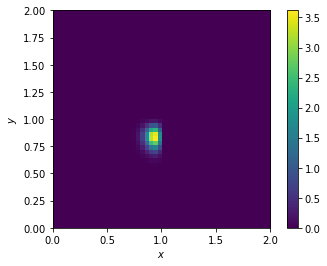

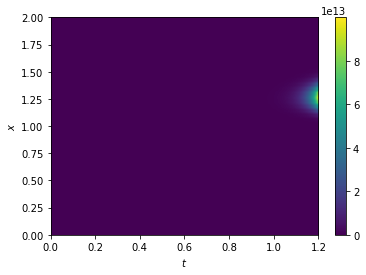

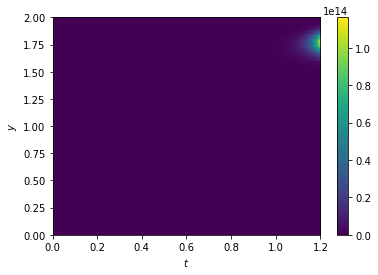

In [8]:
# Plot the probability distribution
plt.imshow(P_store[:,:,100], extent=[x_extent[0], x_extent[1], y_extent[0], y_extent[1]], origin='lower')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# Plot the x distribution against time
plt.imshow(P_store.sum(axis=0), aspect='auto', extent=[0, n_time*delta, x_extent[0], x_extent[1]])
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

# Plot the y distribution against time
plt.imshow(P_store.sum(axis=1), aspect='auto', extent=[0, n_time*delta, y_extent[0], y_extent[1]])
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.show()


In [10]:
print(P_store.max())

23500054529036.023
